In [6]:
import matplotlib.pyplot as plt
import pandas as pd

n = 30
instance = "AB20-ar3"
# file_path = f"/Users/maoyan/Codes/Python/gym-flp-fbs/Files/ExpResult/{instance}-模拟退火算法1.xlsx"
file_path = f"/Users/maoyan/Codes/Python/gym-flp-fbs/Files/ExpResult/{instance}-RL+遗传算法.xlsx"
is_repair = True
# 提取数据
datas = []
df = pd.read_excel(file_path)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者 ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


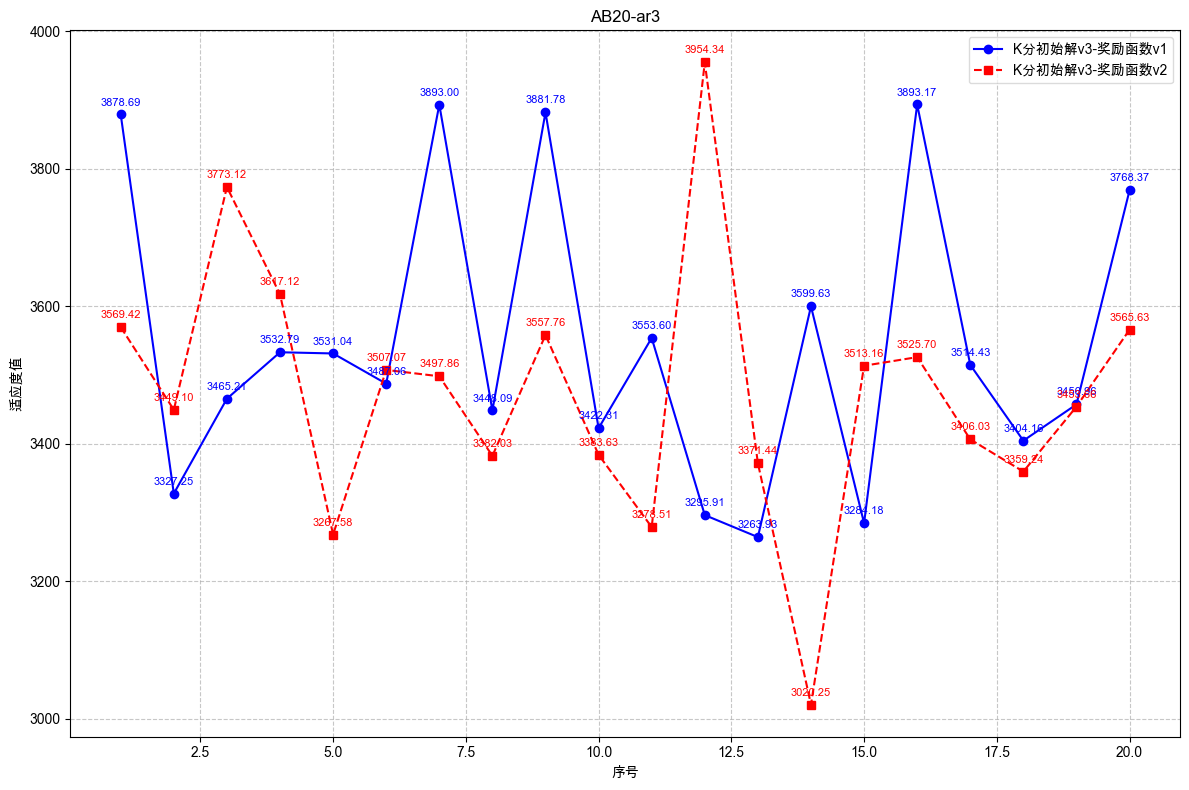

In [7]:

groups = df.groupby('备注')

# 过滤器
# 过滤掉group_name 包含随机的
# groups = [(group_name, group_df) for group_name, group_df in groups if '随机' not in group_name]

# 将每一组的值进行排序
# for group_name, group_df in groups:
#     # 排序
#     group_df.sort_values(by='适应度值', ascending=True, inplace=True)
#     # 重新索引
#     group_df.reset_index(drop=True, inplace=True)
#     # 重新赋值
#     groups = [(group_name, group_df) for group_name, group_df in groups if group_name == group_name]


# 使用不同颜色和线型绘制
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D', '*', 'x', '+']

# 创建一个足够大的图形以容纳标注
plt.figure(figsize=(12, 8))

for i, (group_name, group_df) in enumerate(groups):
    # 创建从1开始的x轴序号
    x_values = range(1, len(group_df) + 1)
    y_values = group_df.适应度值.values
    
    color_idx = i % len(colors)
    style_idx = i % len(line_styles)
    marker_idx = i % len(markers)
    
    # 绘制折线
    plt.plot(x_values, y_values, 
             label=group_name,
             color=colors[color_idx],
             linestyle=line_styles[style_idx],
             marker=markers[marker_idx],
             markersize=6)
    
    # 在每个点上添加标注
    for x, y in zip(x_values, y_values):
        plt.annotate(f'{y:.2f}',  # 保留两位小数
                    xy=(x, y),  # 点的位置
                    xytext=(0, 5),  # 文字与点的相对位置（稍微向上偏移）
                    textcoords='offset points',  # 使用偏移坐标
                    ha='center',  # 水平居中对齐
                    va='bottom',  # 垂直底部对齐
                    fontsize=8,  # 字体大小
                    color=colors[color_idx])  # 使用与线相同的颜色
    
# 添加标题和标签
plt.title(instance)
plt.xlabel('序号')
plt.ylabel('适应度值')

# 显示图例并优化位置
plt.legend(loc='best', frameon=True, fancybox=True, framealpha=0.7)

# 添加网格线以便更好地查看
plt.grid(True, linestyle='--', alpha=0.7)

# 优化图表边距
plt.tight_layout()

plt.show()